Insgesamt gefunden: 29 Gehälter
Gehälter wurden in 'gehaelter.txt' und 'gehaelter.csv' gespeichert.


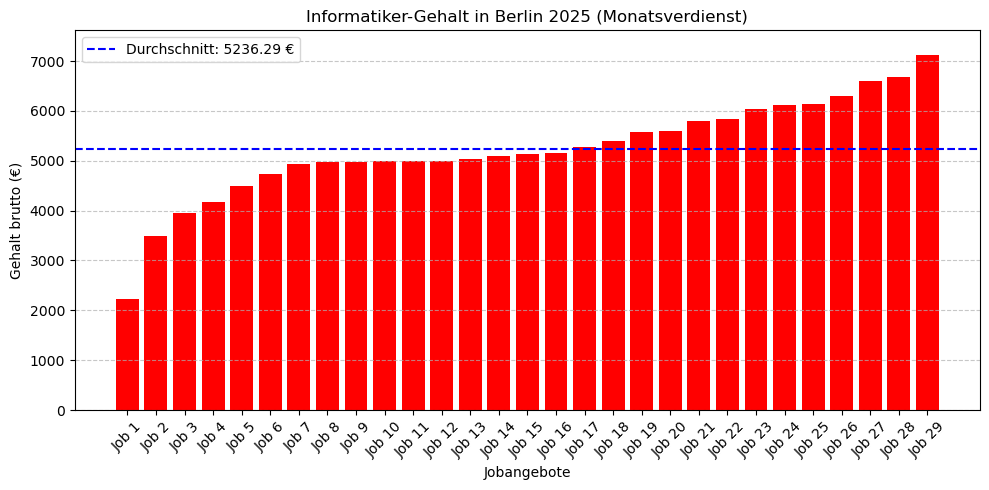

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import csv
import re
import matplotlib.pyplot as plt

# Header setzen, um wie ein normaler Browser zu wirken
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Liste für Gehaelter
gehaelter = []

urls = [
    "https://www.jobvector.de/jobs/informatiker/12103/",
    "https://www.jobvector.de/jobs/informatiker/12103/?sort=score&pn=2"
]

# Seiten durchgehen
for url in urls:
    response = requests.get(url, headers=headers)
    time.sleep(1.5)
    soup = BeautifulSoup(response.text, "html.parser")

    for span in soup.find_all("span"):
        text = span.get_text(strip=True) # Leerzeichen entfernen
        if "€" in text:
            gehaelter.append(text)

# Duplikate entfernen und sortieren
gehaelter = list(set(gehaelter))
gehaelter.sort()

# Liste für die berechneteten Gehaelter
gehaelter_monat = []

# Gehaltsangaben bereinigen und einheitlich als Monatsgehalt speichern
for gehalt in gehaelter:
    # Alle Zahlen (mit Punkt und Komma) im Text finden,
    # Punkte entfernen und Komma durch Punkt ersetzen,
    # dann in Fließkommazahlen (float) umwandeln (Mit Hilfe von ChatGPT)
    zahlen = [float(x.replace('.', '').replace(',', '.')) for x in re.findall(r'[\d\.,]+', gehalt)]
    if "€/Jahr" in gehalt:
        wert = sum(zahlen) / len(zahlen) / 12  # Mittelwert und dann durch 12
        gehalt = f"{wert:.2f} €/Monat"
    elif "€/Monat" in gehalt and len(zahlen) > 1:
        wert = sum(zahlen) / len(zahlen)  # Mittelwert der Monatswerte
        gehalt = f"{wert:.2f} €/Monat"
    gehaelter_monat.append(gehalt)

# Sortieren
gehaelter_monat.sort()

# Als TXT speichern
with open("tabellen/gehaelter.txt", "w", encoding="utf-8") as f:
    # Index startet bei 1
    for i, gehalt in enumerate(gehaelter_monat, 1):
        f.write(f"{i}: {gehalt}\n")

# Als CSV speichern, kein automatischer Zeilenumbruch
with open("tabellen/gehaelter.csv", "w", encoding="utf-8", newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    # Spaltenüberschriften
    writer.writerow(["Nr", "Gehalt (€/Monat)"])
    for i, gehalt in enumerate(gehaelter_monat, 1):
        writer.writerow([i, gehalt])

print(f"Insgesamt gefunden: {len(gehaelter_monat)} Gehälter")
print("Gehälter wurden in 'gehaelter.txt' und 'gehaelter.csv' gespeichert.")

# Gehälter als Float extrahieren (für Diagramm)
gehaelter_float = []
for g in gehaelter_monat:
    wert = float(g.split(" ")[0].replace(",", "."))
    gehaelter_float.append(wert)

# Durchschnitt berechnen
durchschnitt = sum(gehaelter_float) / len(gehaelter_float)

# Labels für X-Achse erzeugen
labels = [f"Job {i}" for i in range(1, len(gehaelter_float) + 1)]

# Balkendiagramm erstellen
plt.figure(figsize=(10,5))
plt.bar(labels, gehaelter_float, color='red')
plt.title("Informatiker-Gehalt in Berlin 2025 (Monatsverdienst)")
plt.xlabel("Jobangebote")
plt.ylabel("Gehalt brutto (€)")
plt.ylim(0, max(gehaelter_float) + 500) # # Y-Achse mit etwas Spielraum nach oben
plt.grid(axis='y', linestyle='--', alpha=0.7) # Hilfslinien
plt.xticks(rotation=45) # Beschriftung drehen

# Durchschnittslinie hinzufügen
plt.axhline(durchschnitt, color='blue', linestyle='--', label=f'Durchschnitt: {durchschnitt:.2f} €')

# Legende anzeigen
plt.legend()
plt.tight_layout()

# Speichern
plt.savefig("bilder/informatiker_gehalt_berlin_2025.png")

# Anzeigen
plt.show()

